In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

In [2]:
file_path1 = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # path to the .scan file
reader1 = scan_handler.ScanReader(file_path1)        # create the object

file_path2 = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_1.scan"    # path to the .scan file
reader2 = scan_handler.ScanReader(file_path2)        # create the object

#file_path1 = "/home/cmsdaq/Analysis/Data/Test/BAW_6_31.scan"    # path to the .scan file
#reader1 = scan_handler.ScanReader(file_path1)        # create the object
#
#file_path2 = "/home/cmsdaq/Analysis/Data/Test/BAW_6_32.scan"    # path to the .scan file
#reader2 = scan_handler.ScanReader(file_path2)        # create the object

In [3]:
freq1 = reader1.get_parameters('f0')
depth1 = np.fabs(reader1.get_parameters('depth'))
Q1 = reader1.get_parameters('Q')

freq2 = reader2.get_parameters('f0')
depth2 = np.fabs(reader2.get_parameters('depth'))
Q2 = reader2.get_parameters('Q')

In [4]:
depth_thr = 0.00001
data1 = np.vstack([freq1,depth1,Q1])
mask1 = ((data1[1] > depth_thr) & (data1[1]!=2))
data1 = data1[:,mask1]

data2 = np.vstack([freq2,depth2,Q2])
mask2 = ((data2[1] > depth_thr) & (data2[1]!=2))
data2 = data2[:,mask2]

data1 = data1[:,(-data1[1]).argsort()]
data2 = data2[:,(-data2[1]).argsort()]


print(data1.shape)
print(data2.shape)

minS = min(data1.shape[1], data2.shape[1])
print(minS)



(3, 87)
(3, 117)
87


In [5]:
#find the minimum distance between each element of the array

import math

maxS = max(data1.shape[1], data2.shape[1])
v_dist = np.ones(maxS)

min_dist_index = []
for freq1,depth1,Q1 in data1.T:
    total_d = []
    for freq2,depth2,Q2 in data2.T:

        freq_d = math.fabs(freq1-freq2)/freq1 * 5  #frequency weights more in the distance
        depth_d = math.fabs(depth1-depth2)/depth1
        Q_d = math.fabs(Q1-Q2)/Q1

        total_d.append(math.sqrt(freq_d**2 + depth_d**2 + Q_d**2))
        #total_d.append(math.sqrt(freq_d**2))

    min_dist_index.append(np.argmin(total_d))

print(len(min_dist_index))


87


[0.10868464 0.99240159]


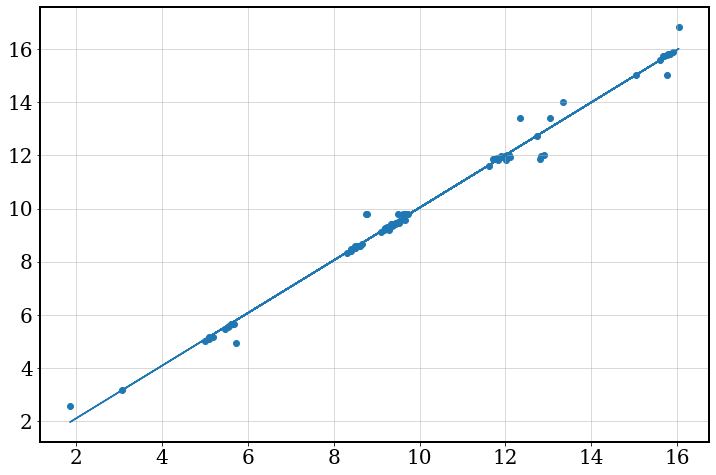

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a + b * x

#freq
popt, pcov = curve_fit(func, data1[0][:minS], data2[0][min_dist_index])

print(popt)

plt.scatter(data1[0][:minS], data2[0][min_dist_index])
plt.plot(data1[0][:minS], func(data1[0][:minS], *popt))
plt.grid(alpha=0.6)
plt.show()



[-4.53871180e-06  1.18002902e+00]


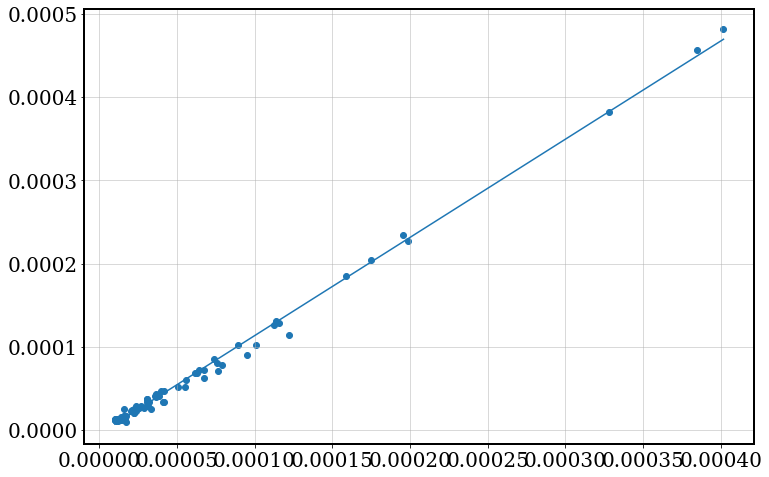

In [15]:
#depth
popt, pcov = curve_fit(func, data1[1][:minS], data2[1][min_dist_index])
print(popt)

plt.scatter(data1[1][:minS], data2[1][min_dist_index])
plt.plot(data1[1][:minS], func(data1[1][:minS], *popt))

plt.grid(alpha=0.6)
plt.show()

[4.71560822e+04 1.00131484e+00]


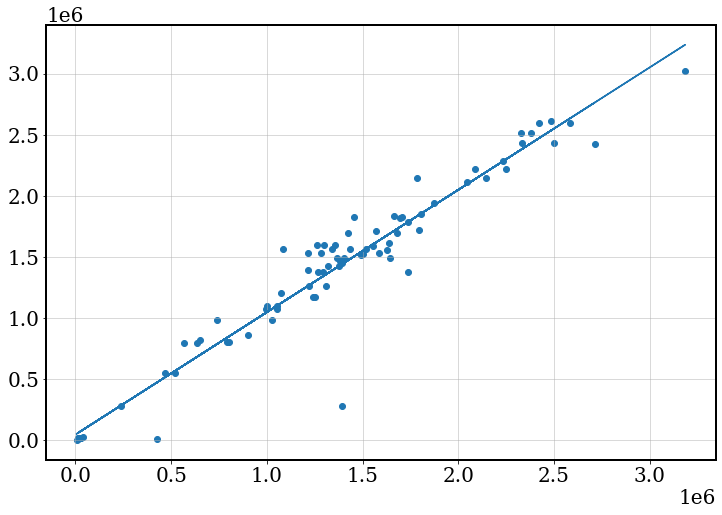

In [16]:
#Q
popt, pcov = curve_fit(func, data1[2][:minS], data2[2][min_dist_index])
print(popt)

plt.scatter(data1[2][:minS], data2[2][min_dist_index])
plt.plot(data1[2][:minS], func(data1[2][:minS], *popt))
plt.grid(alpha=0.6)
plt.show()